In [4]:
import pandas as pd
import io
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


In [5]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, activation
from keras.layers import LSTM
from keras.layers import Dropout
from math import sqrt
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras import regularizers
from keras.regularizers import l2
from keras.regularizers import l1
from keras.regularizers import L1L2
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization




# ***Data Download***

In [6]:
from google.colab import files
uploaded = files.upload()


Saving HomeC.csv to HomeC (1).csv


In [7]:
#df = pd.read_csv(io.BytesIO(uploaded['HomeC.csv']))
df = pd.read_csv('/content/HomeC.csv')
df.head(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
5,1451624405,1.391867,0.003433,1.391867,0.000283,0.503250,0.063667,0.447033,0.122300,0.006717,0.012433,0.000483,0.000567,0.000000,0.031450,0.001017,0.004067,0.001583,0.003433,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
6,1451624406,1.366217,0.003450,1.366217,0.000283,0.499400,0.063717,0.443267,0.122050,0.006733,0.012417,0.000517,0.000550,0.000000,0.031550,0.001033,0.004117,0.001533,0.003450,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
7,1451624407,1.431900,0.003417,1.431900,0.000250,0.477867,0.178633,0.444283,0.121800,0.006783,0.012550,0.000483,0.000450,0.000000,0.031733,0.001033,0.004200,0.001550,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
8,1451624408,1.627300,0.003417,1.627300,0.000183,0.447650,0.365700,0.441467,0.121617,0.006950,0.012717,0.000467,0.000300,0.000017,0.031767,0.001017,0.004200,0.001567,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
9,1451624409,1.735383,0.003417,1.735383,0.000017,0.171550,0.682500,0.438733,0.121633,0.007233,0.013350,0.000367,0.000050,0.000000,0.031667,0.001017,0.004200,0.001617,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0


# ***Step 1: Data Preprocessing***

In [8]:
# 1.1 Convert the timestamp to datatime. 
df['time'] = pd.to_datetime(df['time'], unit='s')
df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min'))
df = df.set_index('time')

# Each column multiply by 1000. 
df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]] = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]*1000

df.head(2)

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,932.833333,3.483333,932.833333,0.0333,20.700000,61.916667,442.633333,124.15,6.983333,13.083333,0.416667,0.15,0.0,31.35,1.016667,4.066667,1.516667,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
2016-01-01 05:01:00,934.333333,3.466667,934.333333,0.0000,20.716667,63.816667,444.066667,124.00,6.983333,13.116667,0.416667,0.15,0.0,31.50,1.016667,4.066667,1.650000,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0


In [9]:
# 1.2 Calculate the total submeter energy consumption of furnace and kitchen.
df['Furnace [kW]'] = df[['Furnace 1 [kW]', 'Furnace 2 [kW]']].sum(axis=1)
df['Kitchen [kW]'] = df[['Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]']].sum(axis=1)

df.drop(['Furnace 1 [kW]','Furnace 2 [kW]','Kitchen 12 [kW]','Kitchen 14 [kW]','Kitchen 38 [kW]'], axis=1, inplace=True)

# Move the Furnace and Kitchen column.
cols = df.columns.tolist()
cols.insert(3, cols.pop(cols.index('Furnace [kW]')))
cols.insert(8, cols.pop(cols.index('Kitchen [kW]')))
cols.insert(20, cols.pop(cols.index('House overall [kW]')))
cols

df = df.reindex(columns= cols)

df.head(2)

,use [kW],gen [kW],Furnace [kW],Dishwasher [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Kitchen [kW],Garage door [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,House overall [kW],pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,932.833333,3.483333,82.616667,0.0333,442.633333,124.15,6.983333,0.566667,13.083333,31.35,1.016667,4.066667,1.516667,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,932.833333,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
2016-01-01 05:01:00,934.333333,3.466667,84.533334,0.0000,444.066667,124.00,6.983333,0.566667,13.116667,31.50,1.016667,4.066667,1.650000,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,934.333333,1016.91,9.18,cloudCover,282,0.0,24.4,0.0


In [10]:
#  1.3 Check missing data.
df.info()
df.isnull().sum()

# There is no missing data. 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use [kW]             503910 non-null  float64
 1   gen [kW]             503910 non-null  float64
 2   Furnace [kW]         503910 non-null  float64
 3   Dishwasher [kW]      503910 non-null  float64
 4   Home office [kW]     503910 non-null  float64
 5   Fridge [kW]          503910 non-null  float64
 6   Wine cellar [kW]     503910 non-null  float64
 7   Kitchen [kW]         503910 non-null  float64
 8   Garage door [kW]     503910 non-null  float64
 9   Barn [kW]            503910 non-null  float64
 10  Well [kW]            503910 non-null  float64
 11  Microwave [kW]       503910 non-null  float64
 12  Living room [kW]     503910 non-null  float64
 13  Solar [kW]           503910 non-null  float64
 14  temperature          503910 non-nu

use [kW]               0
gen [kW]               0
Furnace [kW]           0
Dishwasher [kW]        0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Kitchen [kW]           0
Garage door [kW]       0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
House overall [kW]     0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

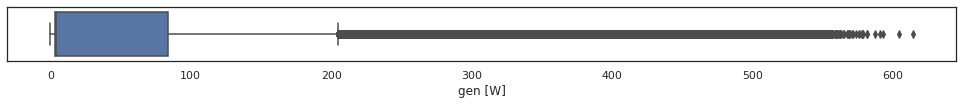

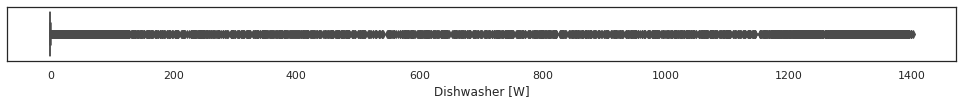

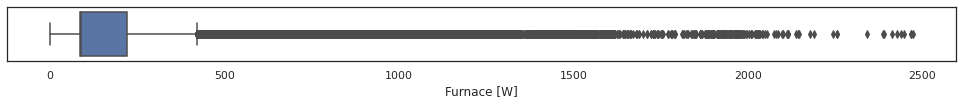

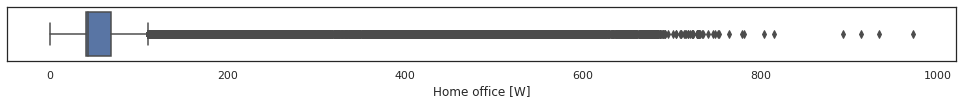

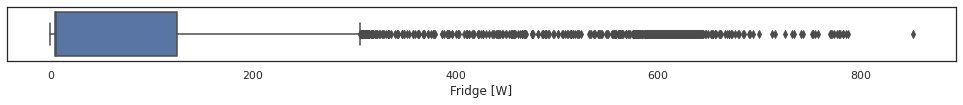

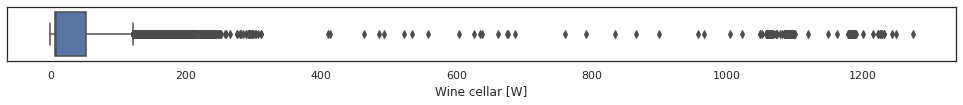

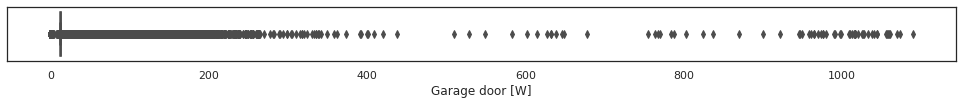

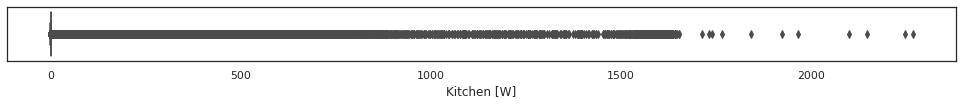

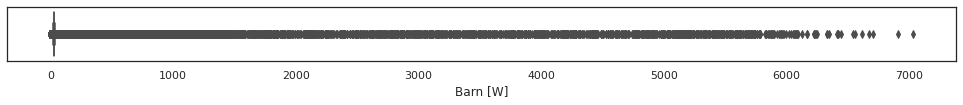

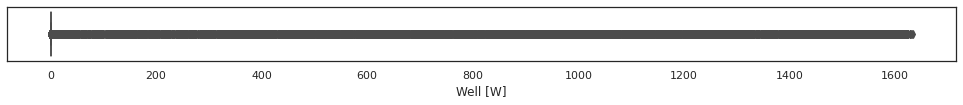

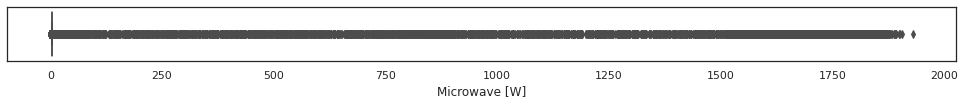

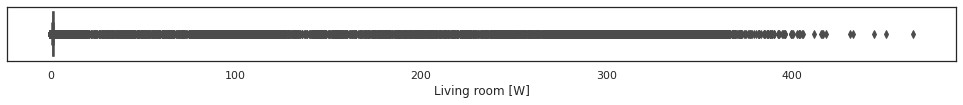

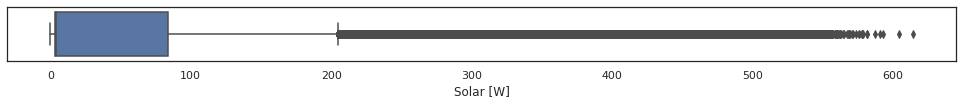

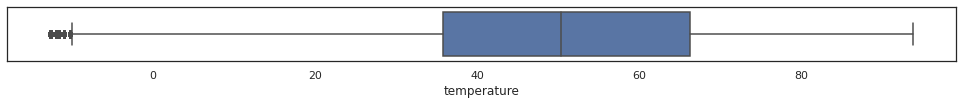

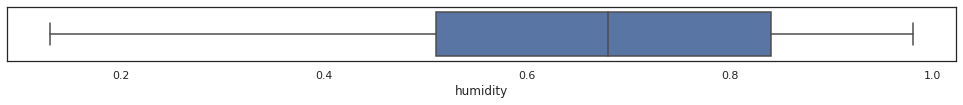

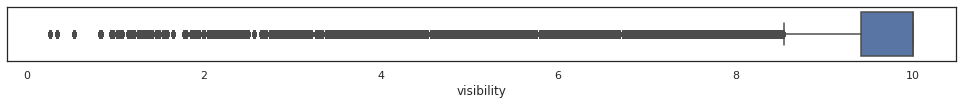

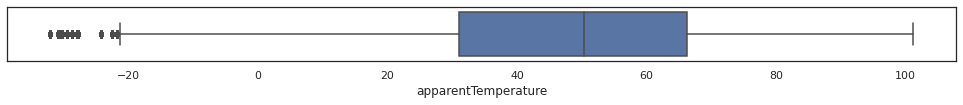

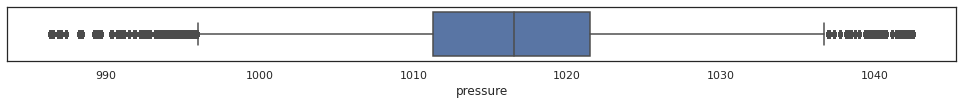

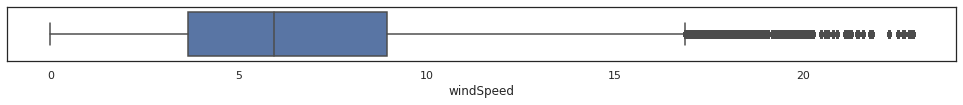

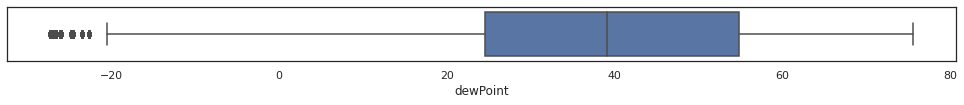

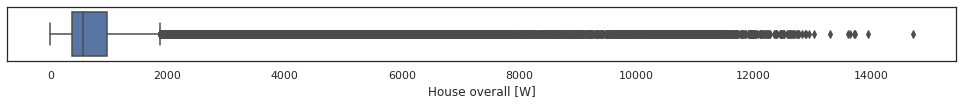

In [ ]:
# 1.4 Check the outliers for each feature. 
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

# All values are within acceptable ranges.

# ***Step 2: Exploratory Data Analysis***

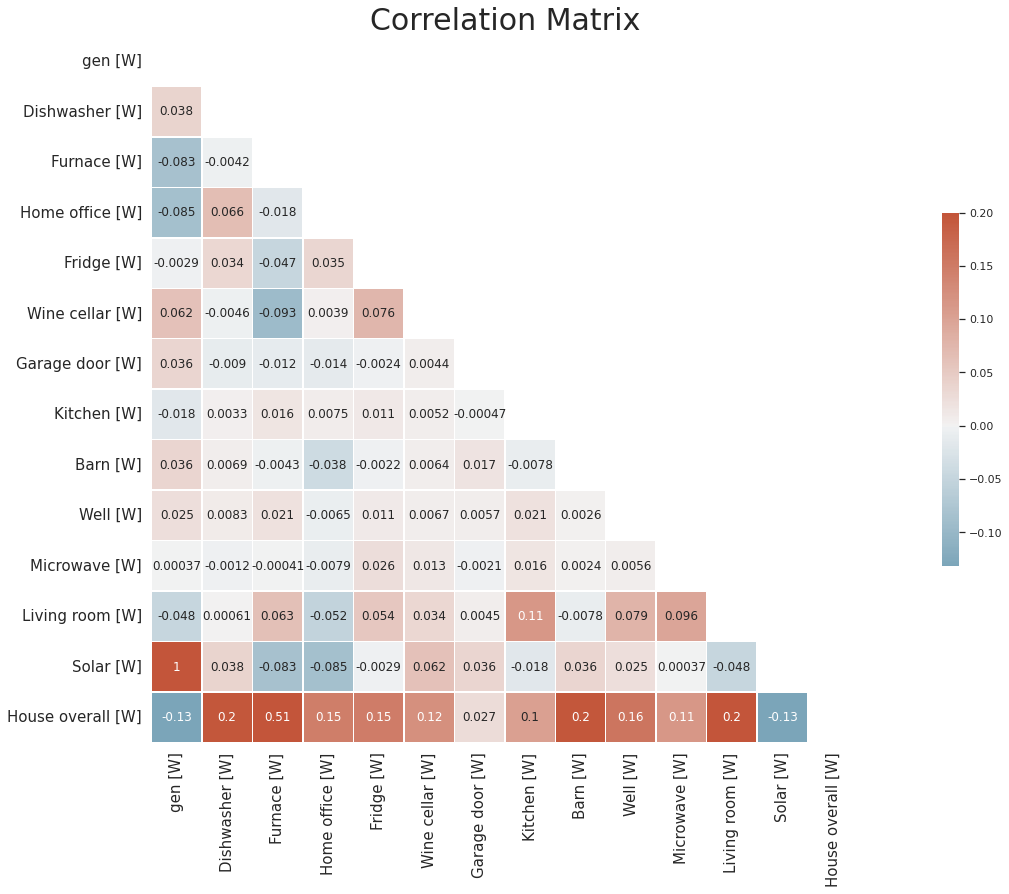

In [ ]:
# 2.1 Exploratory data analysis of energy correlation. 
df_eda_1 = df.copy()
# df_eda_1 = df_eda_1[df_eda_1.columns[0:13]]

df_eda_1 = df_eda_1.drop(['temperature', 'humidity',	'visibility', 'apparentTemperature', 'pressure', 'windSpeed', 'dewPoint'], axis=1)

sns.set_theme(style="white")

corr = df_eda_1.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g= sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot= True )

g.axes.set_title("Correlation Matrix",fontsize=30)
g.tick_params(labelsize= 15)

g.figure.savefig(r'D:\Edmonton_project\Alberta_project\Courses\Fall_2022\MATH 509 Data Structures and Platforms\Final_project\Figure\Correlation_matrix.pdf',bbox_inches = 'tight',dpi=1200)

# Based on the corrlation matrix, we can delete some redundant and useless features. Gen and solar have a really strong correlation (1) that they are the same data.
# So the solar feature can be deleted. 

df.drop(['Solar [W]'], axis=1, inplace= True)


# ***Step 3: Grouping***

In [ ]:
# df['month'] = df.index.month
# df['day'] = df.index.day
# df['weekday'] = df.index.day_name()
# df['hour'] = df.index.hour
# df['minute'] = df.index.minute
df.head(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
5,1451624405,1.391867,0.003433,1.391867,0.000283,0.503250,0.063667,0.447033,0.122300,0.006717,0.012433,0.000483,0.000567,0.000000,0.031450,0.001017,0.004067,0.001583,0.003433,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
6,1451624406,1.366217,0.003450,1.366217,0.000283,0.499400,0.063717,0.443267,0.122050,0.006733,0.012417,0.000517,0.000550,0.000000,0.031550,0.001033,0.004117,0.001533,0.003450,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
7,1451624407,1.431900,0.003417,1.431900,0.000250,0.477867,0.178633,0.444283,0.121800,0.006783,0.012550,0.000483,0.000450,0.000000,0.031733,0.001033,0.004200,0.001550,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
8,1451624408,1.627300,0.003417,1.627300,0.000183,0.447650,0.365700,0.441467,0.121617,0.006950,0.012717,0.000467,0.000300,0.000017,0.031767,0.001017,0.004200,0.001567,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
9,1451624409,1.735383,0.003417,1.735383,0.000017,0.171550,0.682500,0.438733,0.121633,0.007233,0.013350,0.000367,0.000050,0.000000,0.031667,0.001017,0.004200,0.001617,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


# ***Step 4: Data Visualization***

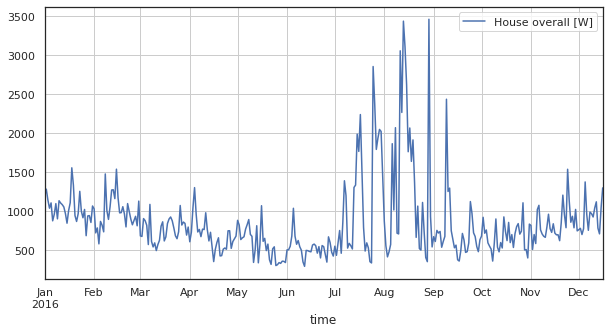

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
df['House overall [W]'].resample('D').mean().plot( grid=True, legend=True)
 
# We can add more figures. 

# ***Step 5: Building Machine Learning Models For the Future Energy Prediction*** 

In [37]:
# 5.1: Re-sample the data at hourly.
df_resample = df.resample('H').mean()   

df_resample.head(10)
# df_resample.shape


,use [kW],gen [kW],Furnace [kW],Dishwasher [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Kitchen [kW],Garage door [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,humidity,visibility,apparentTemperature,House overall [kW],pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,1044.129722,3.306944,393.188056,0.063620,241.814167,37.861111,63.350556,0.820568,13.046111,38.880556,1.042222,21.651667,1.504722,0.003307,36.131000,0.619667,10.0,29.264667,1044.129722,1016.888000,9.150333,282.100000,0.0,24.383333,0.0
2016-01-01 06:00:00,918.166944,3.421667,456.707500,0.099172,43.293611,75.521944,112.941667,0.748624,12.836111,39.181389,1.020833,4.216111,1.618056,0.003422,35.838667,0.610000,10.0,29.364667,918.166944,1016.232000,8.284000,284.733333,0.0,23.866000,0.0
2016-01-01 07:00:00,714.736111,3.448333,372.170000,0.042507,43.416111,59.485556,7.184167,0.726404,13.298611,34.439167,1.013889,4.245556,1.628611,0.003448,35.385000,0.613000,10.0,29.034000,714.736111,1015.989000,7.927000,279.400000,0.0,23.469000,0.0
2016-01-01 08:00:00,960.012778,3.447500,616.370278,0.138337,65.013889,60.411944,7.044722,0.805563,12.925278,34.195000,1.016389,4.274167,1.634444,0.003447,35.282000,0.640000,10.0,30.395333,960.012778,1016.042000,5.684667,265.000000,0.0,24.202667,0.0
2016-01-01 09:00:00,639.836389,3.439167,343.842500,0.060285,43.391667,35.105833,7.142778,0.795854,13.220000,31.829722,1.013611,4.257778,1.650000,0.003439,35.451667,0.641667,10.0,29.673333,639.836389,1015.815000,6.975000,265.500000,0.0,24.423333,0.0
2016-01-01 10:00:00,1219.416111,3.425833,860.670556,0.072219,43.238056,51.328056,7.190000,0.748624,13.058056,34.141667,1.010278,4.251389,1.621111,0.003426,35.206000,0.652000,10.0,29.714000,1219.416111,1015.576000,6.466000,266.400000,0.0,24.816000,0.0
2016-01-01 11:00:00,798.747222,3.422500,455.188333,0.083895,43.267500,59.360278,7.114167,0.788903,13.116944,31.761667,1.011389,4.211944,1.606389,0.003422,35.006333,0.660000,10.0,29.559333,798.747222,1015.573667,6.352667,259.766667,0.0,24.901333,0.0
2016-01-01 12:00:00,537.054722,3.418889,270.219167,0.087229,42.832500,48.724167,6.980555,0.786123,12.913611,31.127222,1.012500,4.255278,1.593333,0.003419,34.998667,0.665333,10.0,29.932667,537.054722,1015.707333,5.828667,258.733333,0.0,24.954667,0.0
2016-01-01 13:00:00,358.376667,6.484167,84.606389,0.006123,41.778056,44.278056,7.071389,0.677243,13.098333,30.184167,1.010556,4.206111,1.561944,0.006484,35.091000,0.671000,10.0,30.018000,358.376667,1015.623000,5.858000,257.100000,0.0,25.267000,0.0


In [38]:
# 5.2 Scale the data using min-max normalization. 
scaler = MinMaxScaler(feature_range=(0,1))
df_resample[df_resample.columns[0:19]] = scaler.fit_transform(df_resample[df_resample.columns[0:19]]) # scale the features

scaler_target = MinMaxScaler(feature_range=(0,1))
df_resample[['House overall [kW]']] = scaler_target.fit_transform(df_resample[['House overall [kW]']]) # scale the label


In [39]:
# 5.3 Split the dataset into traning and testing. 
size  = int(len(df_resample)*0.8) # split the data into 0.8 for training and 0.3 for testing. 

df_resample_train = df_resample[:size]
df_resample_test = df_resample[size:]

X_train, X_test = [], []
Y_train, Y_test = [], []

n_past=1
n_future=1

# for i in range(n_past, len(df_resample_train)-n_future+1):
#     X_train.append(df_resample_train.iloc[i-n_past:i, 0:df_resample.shape[1]])
#     Y_train.append(df_resample_train.iloc[i+n_future-1:i+n_future, 0])
# for i in range(n_past, len(df_resample_test)-n_future+1):
#     X_test.append(df_resample_test.iloc[i-n_past:i, 0:df_resample_test.shape[1]])
#     Y_test.append(df_resample_test.iloc[i+n_future-1:i+n_future, 0])

for i in range(n_past, len(df_resample_train)-n_future+1):
    X_train.append(df_resample_train.iloc[i-n_past:i, 0:df_resample.shape[1]])
    Y_train.append(df_resample_train.iloc[i+n_future-1:i+n_future, 19])
for i in range(n_past, len(df_resample_test)-n_future+1):
    X_test.append(df_resample_test.iloc[i-n_past:i, 0:df_resample_test.shape[1]])
    Y_test.append(df_resample_test.iloc[i+n_future-1:i+n_future, 19])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('Y_train shape', Y_train.shape)
print('Y_test shape', Y_test.shape)

# print(X_train)

X_train shape (6718, 1, 25)
X_test shape (1679, 1, 25)
Y_train shape (6718, 1)
Y_test shape (1679, 1)


In [ ]:
# 5.4 Build and train the LSTM model. 

lstm_model = Sequential()
# First layer. 
lstm_model.add(LSTM(25, activation='relu',return_sequences = False, recurrent_initializer="orthogonal", input_shape=((X_train.shape[1], X_train.shape[2]))))
lstm_model.add(Dropout(0.5))
lstm_model.add(BatchNormalization())
# # Second layer. 
# lstm_model.add(LSTM(50, activation='relu',return_sequences = False))
# lstm_model.add(Dropout(0.2))
# # Third layer. 
# lstm_model.add(LSTM(50, activation='relu',return_sequences = False))
# lstm_model.add(Dropout(0.2))

# Add the output layer.
# lstm_model.add(Dense(1, activation='relu',kernel_regularizer=regularizers.l2(0.01))) # introduce the l2 regularization.
lstm_model.add(Dense(1,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=0.01))) # introduce the l1, l2regularization.
# lstm_model.add(Dense(1, activation='relu'))

# Compile the LSTM.
optimizer = keras.optimizers.Adam(lr=0.0005) # 0.0005
lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

lstm_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25)                4600      
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 batch_normalization (BatchN  (None, 25)               100       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 4,726
Trainable params: 4,676
Non-trainable params: 50
_________________________________________________________________


In [ ]:
# 5.4.1: Fit the model.
model_fit = lstm_model.fit(X_train, Y_train, epochs=60, verbose=0, batch_size=30)

In [ ]:
# 5.4.2: Calculate the predicted values. 
Train_pred = lstm_model.predict(X_train, verbose=0)
Y_pred = lstm_model.predict(X_test, verbose=0)

print('MSE Train', mean_squared_error(Train_pred, Y_train))


MSE Train 0.003202002737221241


Train MSE minimum: 0.004432508256286383


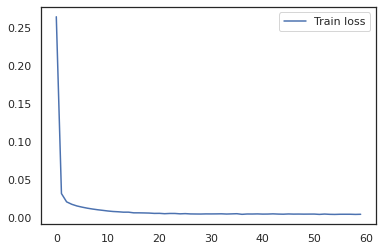

In [ ]:
# 5.4.3: Plot the loss. 
plt.plot(model_fit.history['loss'], label='Train loss')
#plt.plot(model_fit.history['val_loss'], label='Validation loss')
plt.legend()
print('Train MSE minimum:', min(model_fit.history['loss']))

In [ ]:
# 5.4.4: Invert scaling. 
df_resample[['House overall [W]']] = scaler_target.inverse_transform(df_resample[['House overall [W]']]) # Y_test
Y_pred = scaler_target.inverse_transform(Y_pred)
Train_pred = scaler_target.inverse_transform(Train_pred) 
Train_Y = scaler_target.inverse_transform(Y_train) 


NameError: ignored

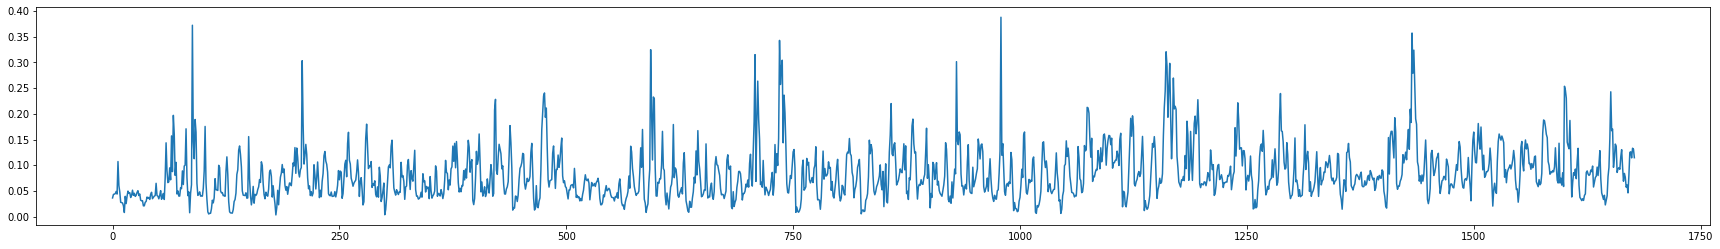

In [26]:
#I may have messed this code up sorry - Alex

plt.figure(figsize=(30,4))
plt.plot(df_resample[['House overall [kW]']][size:-1].values)
plt.plot(Y_pred, linestyle='dashed')
plt.title('LSTM Model Test Data Performance compared to Actual Data')
plt.ylabel('Normalized Whole house Data (kW)')
plt.xlabel('Data Point Number')
plt.legend(['Data','Training Model', 'Test Model'])
# np.sqrt(mean_squared_error(Y_pred[:,0].tolist(), df_resample[['House overall [W]']][size:-1].values))

In [ ]:
Y_pred_series = pd.Series(Y_pred.flatten().tolist(), index=df_resample['House overall [W]'][size:-n_past].index)
Train_pred_series = pd.Series(Train_pred.flatten().tolist(), index=df_resample['House overall [W]'][n_past:size].index)

plt.figure(figsize=(20,8))
plt.plot(df_resample['House overall [kW]'][:-n_past], c='blue', label='data')
plt.plot(Y_pred_series, c='red', label='model test', linestyle='dashed')
plt.plot(Train_pred_series, c='green', label='model train', linestyle='dashed')
plt.title('Data vs LSTM Model for year of Data')
plt.ylabel('Normalized Whole house Data (kW)')
plt.xlabel('Date (day)')
plt.legend(['Data','Training Model', 'Test Model'])
plt.legend()
plt.grid(), plt.margins(x=0);

In [ ]:
Y_test.head(10)



time
2016-10-07 04:00:00     469.035833
2016-10-07 05:00:00     350.432778
2016-10-07 06:00:00     416.246389
2016-10-07 07:00:00     421.772222
2016-10-07 08:00:00     430.647500
2016-10-07 09:00:00     471.156389
2016-10-07 10:00:00     422.301667
2016-10-07 11:00:00    1028.547778
2016-10-07 12:00:00     579.894722
2016-10-07 13:00:00     458.420833
Freq: H, Name: House overall [W], dtype: float64

In [ ]:
Y_pred_series.head(10)

time
2016-09-02 04:00:00    500.585968
2016-09-02 05:00:00    559.218140
2016-09-02 06:00:00    511.577942
2016-09-02 07:00:00    518.766113
2016-09-02 08:00:00    690.813904
2016-09-02 09:00:00    567.644592
2016-09-02 10:00:00    906.379639
2016-09-02 11:00:00    889.445801
2016-09-02 12:00:00    550.513550
2016-09-02 13:00:00    202.532684
Freq: H, dtype: float64

In [ ]:
mean_squared_error(Y_test, Y_pred_series)

79767.14111259155

In [ ]:
print('MSE: %.5f' % (mean_squared_error(Y_test, Y_pred)))
print('Training MSE: %.5f' % (mean_squared_error(Train_pred, Train_Y)))
print('RMSE: %.5f' % np.sqrt(mean_squared_error(Y_pred, Y_test)))
MAE = mean_absolute_error(Y_test, Y_pred)
MAPE = np.mean(np.abs(Y_pred[:,0] - Y_test.values)/np.abs(Y_test.values))
#MASE = np.mean(np.abs(Y_test - Y_pred))/(np.abs(np.diff(X_train)).sum()/(len(X_train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
#print('MASE: %.3f' %MASE)
print('Training R^2 score: %.3f' % r2_score(Train_Y, Train_pred))
print('R^2 score: %.3f' % r2_score(Y_test, Y_pred))

MSE: 86378.58986
Training MSE: 293830.52668
RMSE: 293.90235
MAE: 221.496
MAPE: 0.421
Training R^2 score: 0.611
R^2 score: 0.626


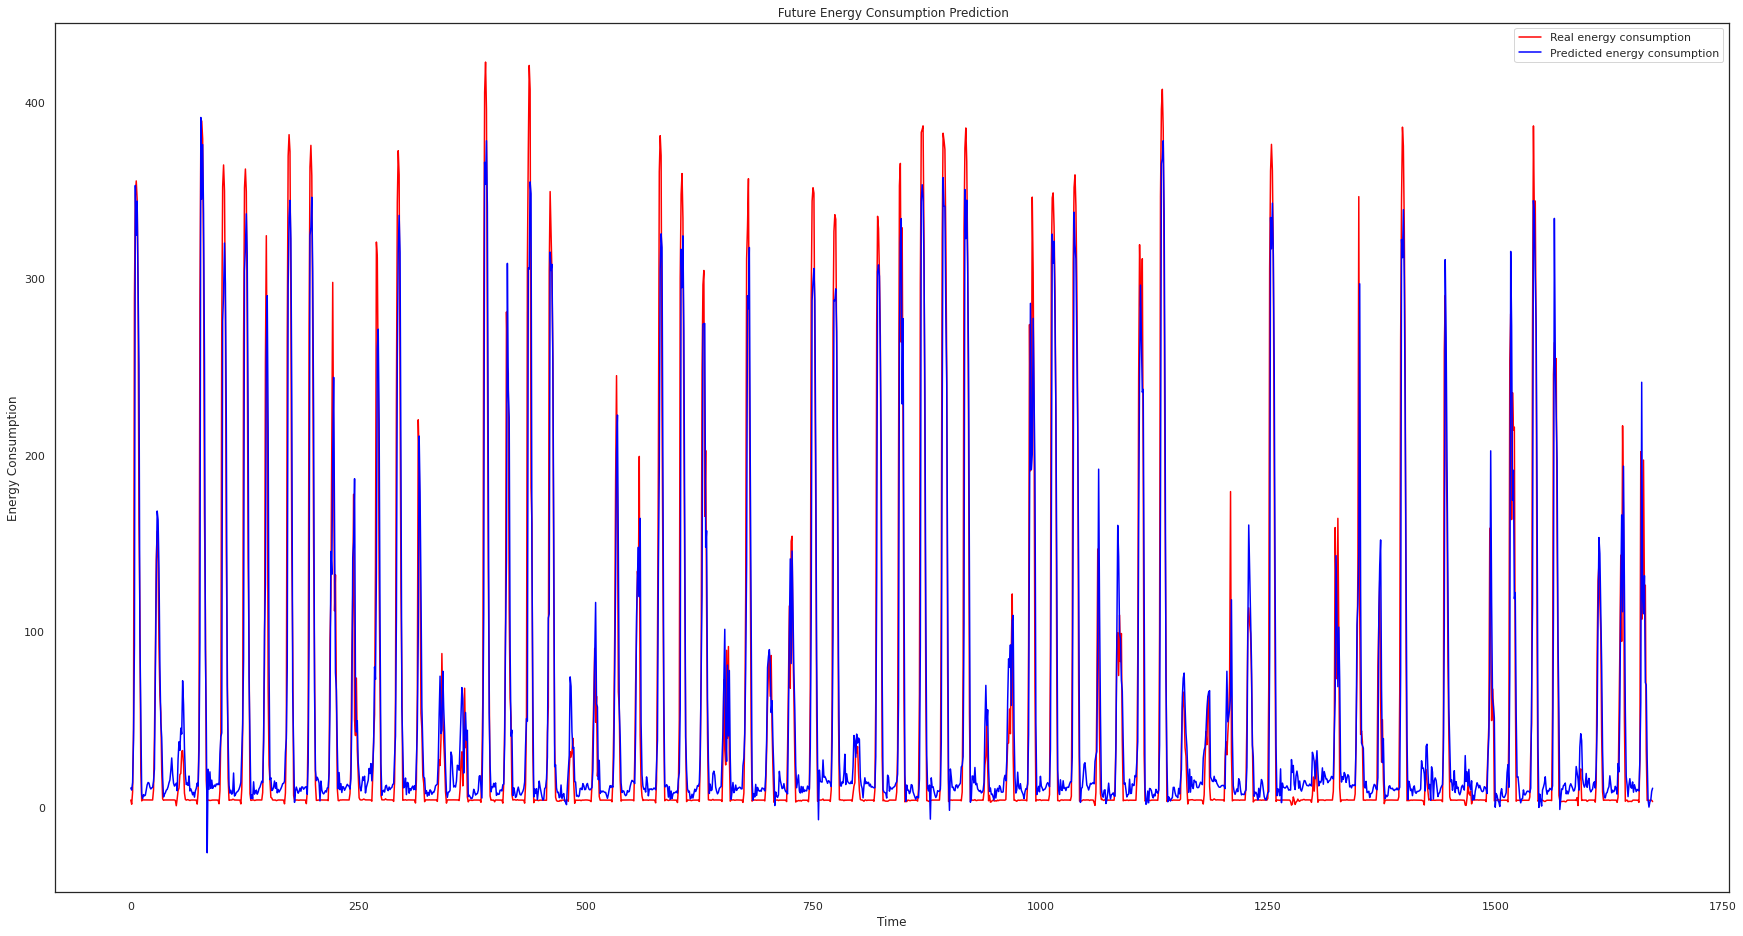

In [ ]:
# # Plot the actual vs. predicted (1).
# plt.rcParams["figure.figsize"] = (30,16)
# plt.plot(original, color = 'red', label = 'Real energy consumption')
# plt.plot(Y_pred, color = 'blue', label = 'Predicted energy consumption')
# plt.title(' Future Energy Consumption Prediction')
# plt.xlabel('Time')
# plt.ylabel('Energy Consumption')
# plt.legend()
# plt.show()

In [ ]:
# Plot the actual vs. predicted (2).
size = int(len(df_resample)*0.8)

n_past = 6

Y_pred_series = pd.Series(Y_pred.flatten().tolist(), index=df_resample['House overall [W]'][size:-n_past].index)
Train_pred_series = pd.Series(Train_pred.flatten().tolist(), index=df_resample['House overall [W]'][n_past:size].index)

plt.figure(figsize=(15,4))
plt.plot(original['House overall [W]'][:-n_past], c='blue', label='data')
plt.plot(Y_pred_series, c='red', label='model test')
plt.plot(Train_pred_series, c='green', label='model train')
plt.legend()
plt.grid(), plt.margins(x=0);
Y_test = df_resample['House overall [W]'][size:-n_past]

IndexError: ignored

<Figure size 1080x288 with 0 Axes>

In [ ]:
df_resample['House overall [W]'].head(10)

time
2016-01-01 05:00:00    1044.129722
2016-01-01 06:00:00     918.166944
2016-01-01 07:00:00     714.736111
2016-01-01 08:00:00     960.012778
2016-01-01 09:00:00     639.836389
2016-01-01 10:00:00    1219.416111
2016-01-01 11:00:00     798.747222
2016-01-01 12:00:00     537.054722
2016-01-01 13:00:00     358.376667
2016-01-01 14:00:00     756.720278
Freq: H, Name: House overall [W], dtype: float64

In [ ]:
# # Build the LSTM model.
# def LSTM_model():
#   lstm_model = Sequential()

#   # First layer
#   lstm_model.add(LSTM(25, activation='relu', input_shape=((trainX.shape[1], trainX.shape[2]))))
#   lstm_model.add(Dropout(0.2))

#   lstm_model.add(Dense(1))

#   return lstm_model

In [ ]:
# # Train the model.
# model = LSTM_model()
# model.compile(optimizer='adam', loss='mse')
# model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 25)                4600      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 4,626
Trainable params: 4,626
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model_fit = model.fit(trainX, trainY, epochs=60, batch_size = 32)

In [ ]:
# # Prediction. 
# Y_prediction = model.predict(testX, verbose=0)

# print("Y_prediction\n", Y_prediction)
# print("\nY_Prediction Shape:",Y_prediction.shape)

# Y_prediction_copies_array = np.repeat(Y_prediction, 20, axis=-1) # 20 features

# print("Y_prediction_copies_array:",Y_prediction_copies_array.shape)


Y_prediction
 [[ 0.01746231]
 [ 0.01868252]
 [ 0.04530804]
 ...
 [-0.00063403]
 [ 0.0045284 ]
 [ 0.02495892]]

Y_Prediction Shape: (1674, 1)
Y_prediction_copies_array: (1674, 20)


In [ ]:
# X_prediction = model.predict(trainX)

# print("X_prediction\n", X_prediction)
# print("\nX_Prediction Shape:",X_prediction.shape)

# X_prediction_copies_array = np.repeat(X_prediction, 20, axis=-1) # 20 features

# print("X_prediction_copies_array:",X_prediction_copies_array.shape)



210/210 [==============================] - 1s 2ms/step
X_prediction
 [[0.00201276]
 [0.00351043]
 [0.00339599]
 ...
 [0.01227178]
 [0.00217384]
 [0.00841221]]

X_Prediction Shape: (6713, 1)
X_prediction_copies_array: (6713, 20)


In [ ]:
# # Invert scaling. 
# Train_pred = scaler.inverse_transform(np.reshape(X_prediction_copies_array,(len(X_prediction),20)))[:,0]
# print("Train_pred values:", Train_pred.shape)

# Y_pred = scaler.inverse_transform(np.reshape(Y_prediction_copies_array,(len(Y_prediction),20)))[:,0]
# print("Y_pred values:", Y_pred.shape)

Train_pred values: (6713,)
Y_pred values: (1674,)


Train MSE minimum: 0.006224698852747679


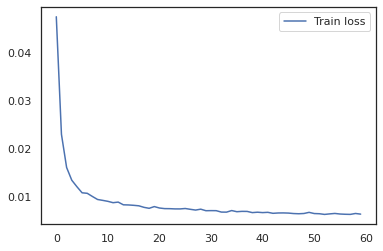

In [ ]:
# Plot the train loss. 
plt.plot(model_fit.history['loss'], label='Train loss')
#plt.plot(model_fit.history['val_loss'], label='Validation loss')
plt.legend()
print('Train MSE minimum:', min(model_fit.history['loss']))

In [ ]:
original_copies_array = np.repeat(testY,20, axis=-1) # 20 features

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),20)))[:,0]

print("original vaules:",original.shape)


original vaules: (1674,)


In [ ]:
# Plot the actual vs. predicted
# plt.plot(original, color = 'red', label = 'Real  Stock Price')
# plt.plot(pred, color = 'blue', label = 'Predicted  Stock Price')
# plt.title(' Future Energy Consumption Prediction')
# plt.xlabel('Time')
# plt.ylabel('Energy Consumption')
# plt.legend()
# plt.show()

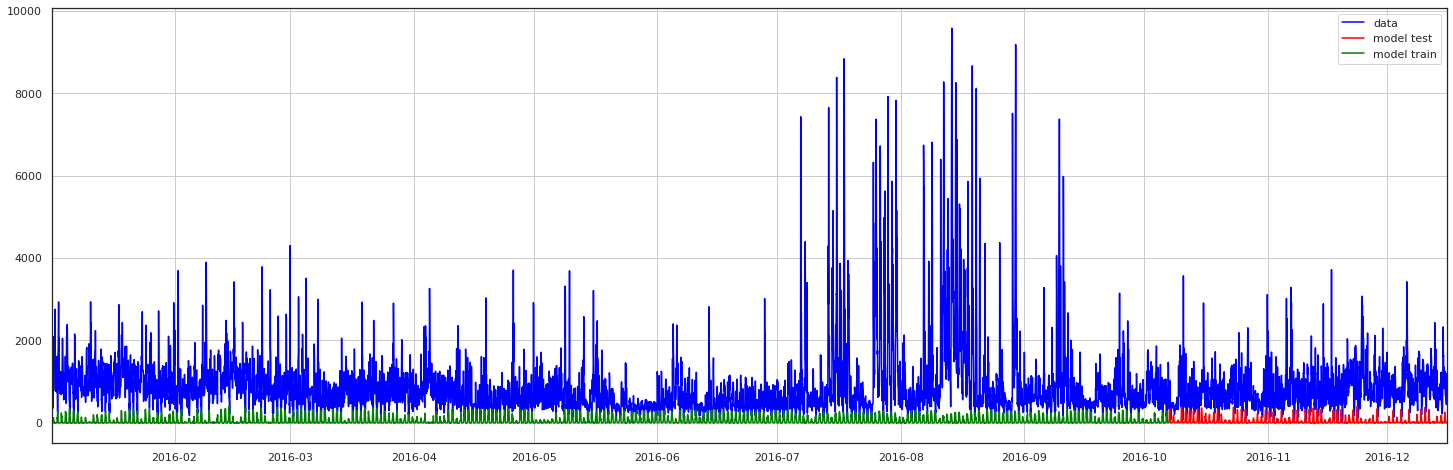

In [ ]:
size = int(len(df_resample)*0.8)

n_past = 6

Y_pred_series = pd.Series(Y_pred.flatten().tolist(), index=df_resample['House overall [W]'][size:-6].index)
Train_pred_series = pd.Series(Train_pred.flatten().tolist(), index=df_resample['House overall [W]'][6:size].index)

plt.figure(figsize=(25,8))
plt.plot(df_resample['House overall [W]'][:-n_past], c='blue', label='data') # groundtruth data
plt.plot(Y_pred_series, c='red', label='model test')
plt.plot(Train_pred_series, c='green', label='model train')
plt.legend()
plt.grid(), plt.margins(x=0);
Y_test = df_resample['House overall [W]'][size:-n_past]

In [ ]:
print('MSE: %.5f' % (mean_squared_error(Y_pred, Y_test)))
print('RMSE: %.5f' % np.sqrt(mean_squared_error(Y_pred, Y_test)))
MAE = mean_absolute_error(Y_test, Y_pred)
# MAPE = np.mean(np.abs(Y_pred[:,0] - Y_test.values)/np.abs(Y_test.values))
#MASE = np.mean(np.abs(Y_test - Y_pred))/(np.abs(np.diff(X_train)).sum()/(len(X_train)-1))
print('MAE: %.3f' % MAE)
# print('MAPE: %.3f' %MAPE)
#print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(Y_test, Y_pred))

MSE: 797003.04248
RMSE: 892.75027
MAE: 747.319
R^2 score: -2.451


In [ ]:
# 5.2: RNN model

In [40]:
X=df_resample.loc[:,['gen [kW]','Furnace [kW]','Dishwasher [kW]','Home office [kW]','Fridge [kW]','Wine cellar [kW]','Kitchen [kW]','Garage door [kW]','Barn [kW]','Well [kW]','Microwave [kW]','Living room [kW]','Solar [kW]','temperature','humidity','visibility','apparentTemperature','pressure','windSpeed','windBearing','precipIntensity','dewPoint','precipProbability']]
X

Y=df_resample.loc[:,['use [kW]']]
Y

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X_minmax,Y,test_size=0.2,random_state=0,shuffle=False)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('Y_train shape', Y_train.shape)
print('Y_test shape', Y_test.shape)

X_train shape (6719, 23)
X_test shape (1680, 23)
Y_train shape (6719, 1)
Y_test shape (1680, 1)


In [41]:
from tensorflow.keras import layers
import tensorflow as tf

inputs = layers.Input(shape=X_train.shape[1])
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
x = layers.SimpleRNN(64, activation='relu', use_bias=True)(x) 
x = layers.Dense(32, activation='relu')(x) 
output = layers.Dense(1)(x)
model_RNN = tf.keras.Model(inputs=inputs, outputs=output)

model_RNN.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mse'])

history = model_RNN.fit(X_train, Y_train, epochs=200, verbose=1, batch_size=32, validation_data= (X_test,Y_test) )

model_RNN.summary()

Epoch 1/200
210/210 [==============================] - 2s 4ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 2/200
210/210 [==============================] - 1s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3/200
210/210 [==============================] - 1s 3ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 4/200
210/210 [==============================] - 1s 3ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/200
210/210 [==============================] - 1s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/200
210/210 [==============================] - 1s 3ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 9.8347e-04 - val_mse: 9.8347e-04
Epoch 7/200
210/210 [==============================] - 1s 3ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 9.8624e-04 - val_mse: 9.8624e-04
Epoch 8/200
210/210 [==============================] 

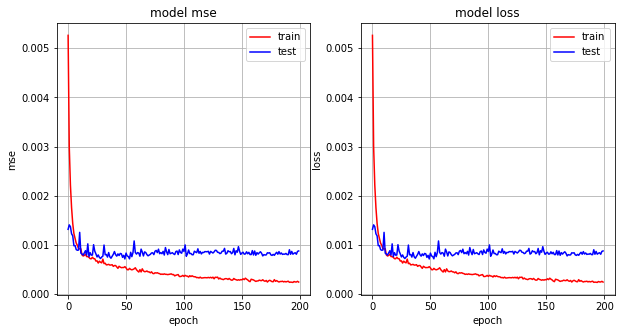

In [42]:
#Accuracy Curves
fig = plt.figure(3, figsize=(10,5))
plt.subplot(121)
plt.plot(history.history['mse'],'r')
plt.plot(history.history['val_mse'],'b')
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.grid()

# Loss Curves
plt.subplot(122)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.grid()

53/53 [==============================] - 0s 2ms/step


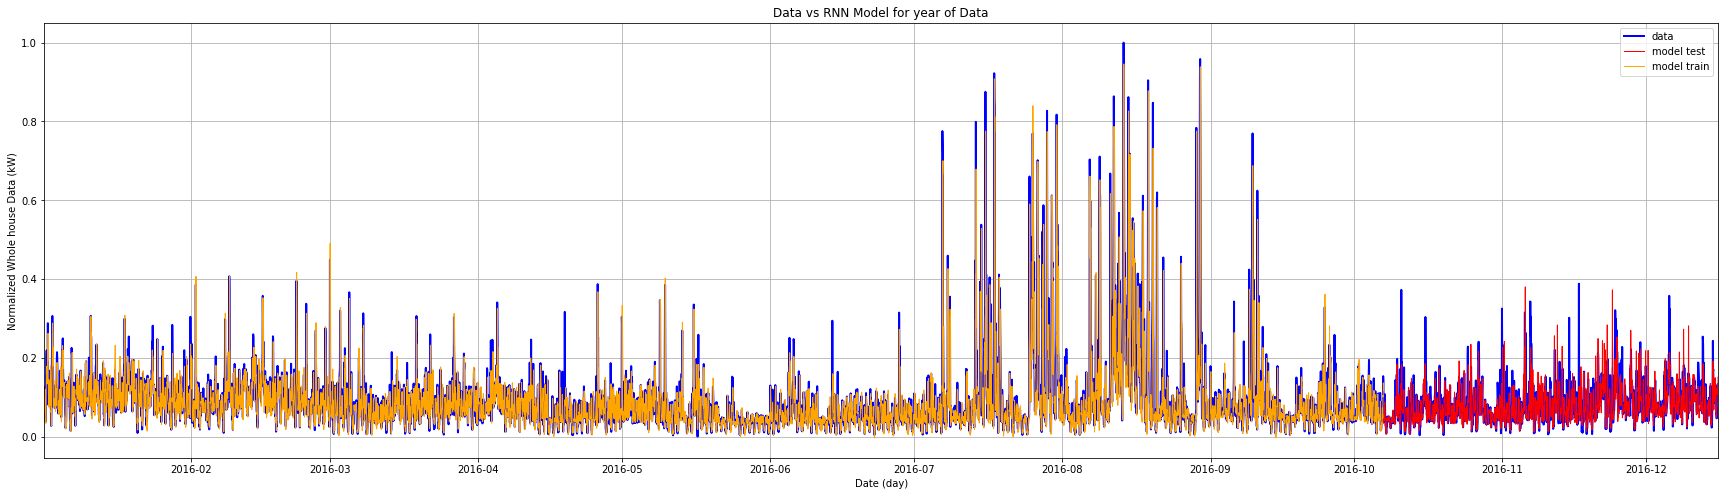

In [43]:
Y_train_hat_RNN = model_RNN.predict(X_train)
Y_test_hat_RNN = model_RNN.predict(X_test)

size = len(Y_train_hat_RNN) - 1

Y_pred_series = pd.Series(Y_test_hat_RNN.flatten().tolist(), index=df_resample['House overall [kW]'][size:-n_past].index)

size = len(Y_train_hat_RNN) + 1

Train_pred_series = pd.Series(Y_train_hat_RNN.flatten().tolist(), index=df_resample['House overall [kW]'][n_past:size].index)

plt.figure(figsize=(30,8))
plt.plot(df_resample['House overall [kW]'][:-n_past], c='blue', label='data', linewidth=2)
plt.plot(Y_pred_series, c='red', label='model test', linewidth=1)
plt.plot(Train_pred_series, c='orange', label='model train', linewidth=1)
plt.title('Data vs RNN Model for year of Data')
plt.ylabel('Normalized Whole house Data (kW)')
plt.xlabel('Date (day)')
plt.legend(['Data','Training Model', 'Test Model'])
plt.legend()
plt.grid(), plt.margins(x=0);

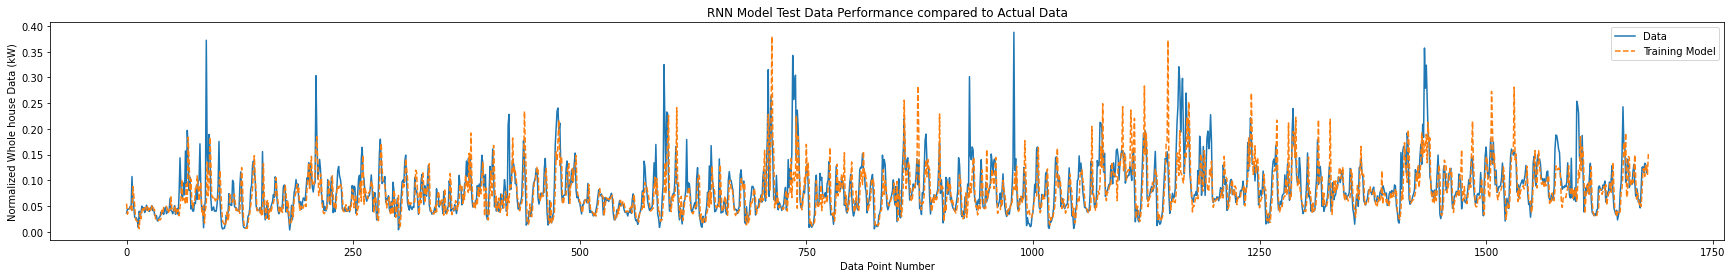

In [44]:
plt.figure(figsize=(30,4))
plt.plot(df_resample[['House overall [kW]']][size:-1].values)
plt.plot(Y_test_hat_RNN, linestyle='dashed')
plt.title('RNN Model Test Data Performance compared to Actual Data')
plt.ylabel('Normalized Whole house Data (kW)')
plt.xlabel('Data Point Number')
plt.legend(['Data','Training Model', 'Test Model'])

In [45]:
# MAE
MAE_RNN=mean_absolute_error(Y_test, Y_test_hat_RNN)
print("MAE for RNN is %.2f" %(MAE_RNN))

# MSE
MSE_RNN= mean_squared_error(Y_test, Y_test_hat_RNN)
print("MSE for RNN is  %.2f " % MSE_RNN)

# R2
R2_RNN= r2_score(Y_test, Y_test_hat_RNN)
print("R2 for RNN is  %.2f " % R2_RNN)

# RMSE
RMSE_RNN= sqrt(MSE_RNN)
print("RMSE for RNN is  %.2f " % RMSE_RNN)

MAE for RNN is 0.01
MSE for RNN is  0.00 
R2 for RNN is  0.65 
RMSE for RNN is  0.03 


In [ ]:
#5.3 GRU Model

In [30]:
X=df_resample.loc[:,['gen [kW]','Furnace [kW]','Dishwasher [kW]','Home office [kW]','Fridge [kW]','Wine cellar [kW]','Kitchen [kW]','Garage door [kW]','Barn [kW]','Well [kW]','Microwave [kW]','Living room [kW]','Solar [kW]','temperature','humidity','visibility','apparentTemperature','pressure','windSpeed','windBearing','precipIntensity','dewPoint','precipProbability']]
X

Y=df_resample.loc[:,['use [kW]']]
Y

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X_minmax,Y,test_size=0.2,random_state=0,shuffle=False)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('Y_train shape', Y_train.shape)
print('Y_test shape', Y_test.shape)

X_train shape (6719, 23)
X_test shape (1680, 23)
Y_train shape (6719, 1)
Y_test shape (1680, 1)


In [31]:
from tensorflow.keras import layers
import tensorflow as tf

inputs = layers.Input(shape=X_train.shape[1])
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
x = layers.GRU(128, activation='tanh', use_bias=True)(x) 
x = layers.Dense(64, activation='relu')(x) 
output = layers.Dense(1)(x)
model_GRU = tf.keras.Model(inputs=inputs, outputs=output)

model_GRU.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['mse'])

history = model_GRU.fit(X_train, Y_train, epochs=200, verbose=1, batch_size=64, validation_data= (X_test,Y_test) )

model_GRU.summary()

Epoch 1/200
105/105 [==============================] - 3s 11ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2/200
105/105 [==============================] - 1s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/200
105/105 [==============================] - 1s 5ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4/200
105/105 [==============================] - 1s 6ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 5/200
105/105 [==============================] - 1s 6ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 6/200
105/105 [==============================] - 1s 5ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 7/200
105/105 [==============================] - 1s 6ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 8/200
105/105 [==============================] - 1s 5ms/step -

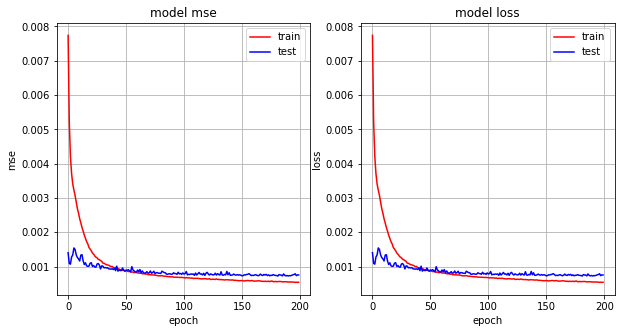

In [32]:
#Accuracy Curves
fig = plt.figure(3, figsize=(10,5))
plt.subplot(121)
plt.plot(history.history['mse'],'r')
plt.plot(history.history['val_mse'],'b')
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.grid()

# Loss Curves
plt.subplot(122)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.grid()

53/53 [==============================] - 0s 2ms/step


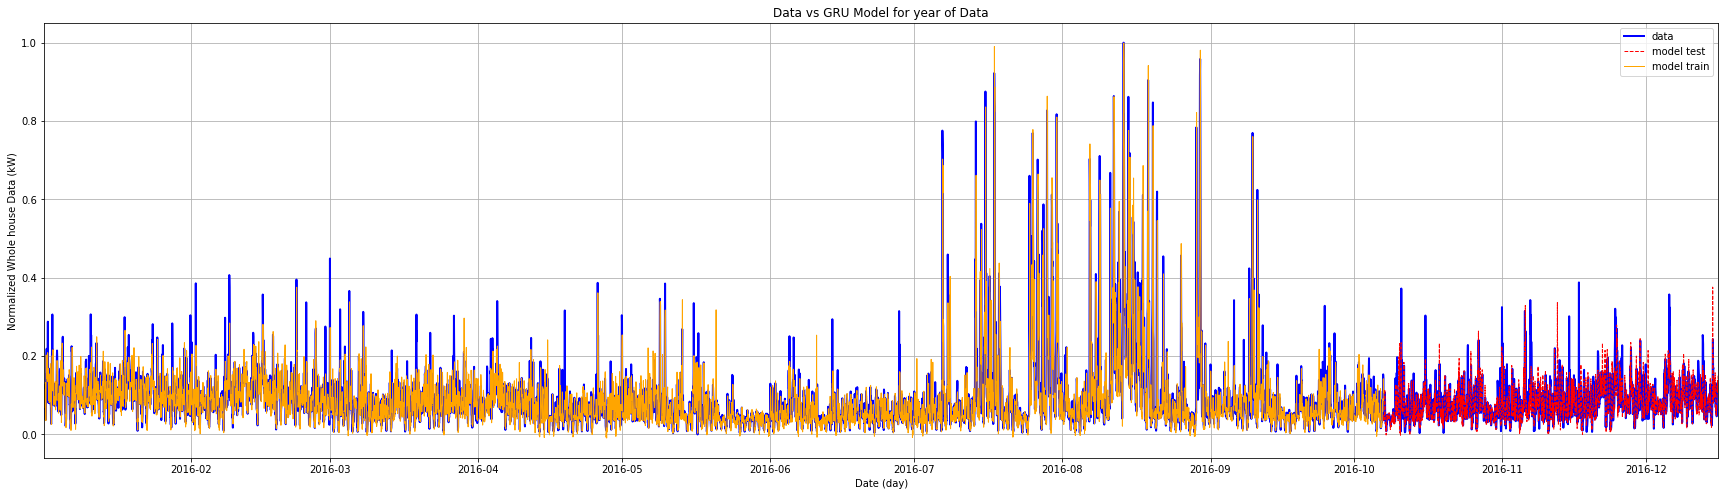

In [34]:
Y_train_hat_GRU = model_GRU.predict(X_train)
Y_test_hat_GRU = model_GRU.predict(X_test)

size = len(Y_train_hat_GRU) - 1

Y_pred_series = pd.Series(Y_test_hat_GRU.flatten().tolist(), index=df_resample['House overall [kW]'][size:-n_past].index)

size = len(Y_train_hat_GRU) + 1

Train_pred_series = pd.Series(Y_train_hat_GRU.flatten().tolist(), index=df_resample['House overall [kW]'][n_past:size].index)

plt.figure(figsize=(30,8))
plt.plot(df_resample['House overall [kW]'][:-n_past], c='blue', label='data', linewidth=2)
plt.plot(Y_pred_series, c='red', label='model test', linewidth=1)
plt.plot(Train_pred_series, c='orange', label='model train', linewidth=1)
plt.title('Data vs GRU Model for year of Data')
plt.ylabel('Normalized Whole house Data (kW)')
plt.xlabel('Date (day)')
plt.legend(['Data','Training Model', 'Test Model'])
plt.legend()
plt.grid(), plt.margins(x=0);

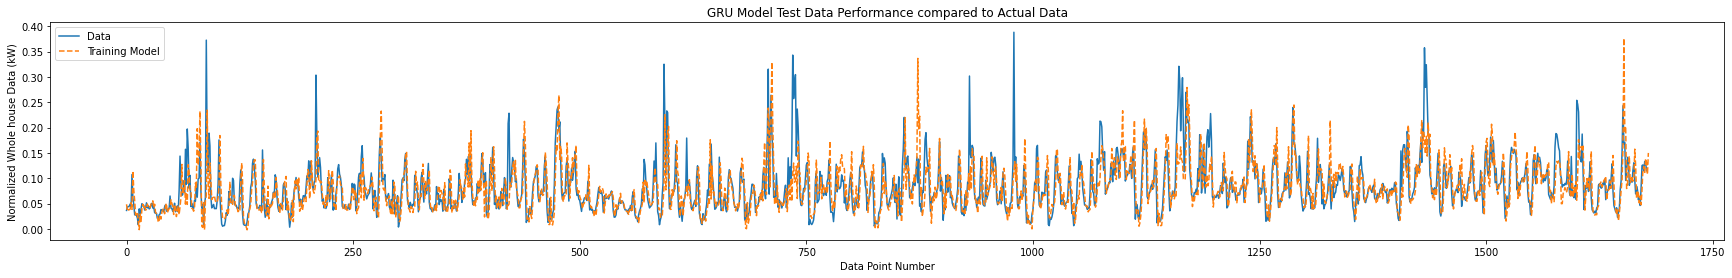

In [35]:
plt.figure(figsize=(30,4))
plt.plot(df_resample[['House overall [kW]']][size:-1].values)
plt.plot(Y_test_hat_GRU, linestyle='dashed')
plt.title('GRU Model Test Data Performance compared to Actual Data')
plt.ylabel('Normalized Whole house Data (kW)')
plt.xlabel('Data Point Number')
plt.legend(['Data','Training Model', 'Test Model'])

In [36]:
# MAE
MAE_GRU=mean_absolute_error(Y_test, Y_test_hat_GRU)
print("MAE for GRU is %.2f" %(MAE_GRU))

# MSE
MSE_GRU= mean_squared_error(Y_test, Y_test_hat_GRU)
print("MSE for GRU is  %.2f " % MSE_GRU)

# R2
R2_GRU= r2_score(Y_test, Y_test_hat_GRU)
print("R2 for GRU is  %.2f " % R2_GRU)

# RMSE
RMSE_GRU= sqrt(MSE_GRU)
print("RMSE for GRU is  %.2f " % RMSE_GRU)

MAE for GRU is 0.01
MSE for GRU is  0.00 
R2 for GRU is  0.70 
RMSE for GRU is  0.03 


In [ ]:
len(Y_test)

1678

# ***Step 6: Building Machine Learning Models For the Real-Time Energy Prediction*** 